**Import Libraries and Data**

In [48]:
#Importing the Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [49]:
from google.colab import files
uploaded = files.upload()

Saving Companies.csv to Companies (2).csv


In [50]:
companies = pd.read_csv('Companies.csv')
companies.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


**Visualize Multiple Variable to Identify Data Distribution​**

<ipython-input-51-12caec5e304d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(companies.corr())


<Axes: >

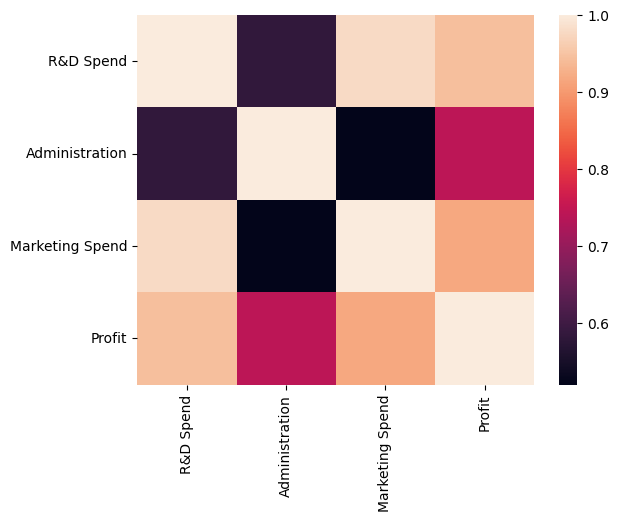

In [51]:
sns.heatmap(companies.corr())

<ipython-input-52-59132b7f353a>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(companies.corr(),annot=True,cmap="cividis")


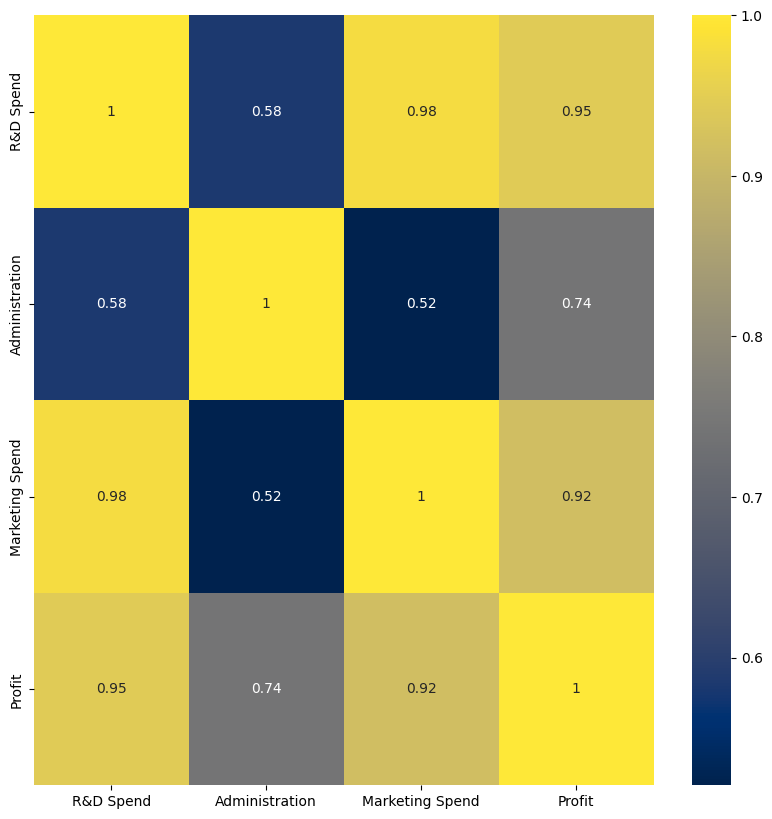

In [52]:

plt.figure(figsize=(10,10))
sns.heatmap(companies.corr(),annot=True,cmap="cividis")
plt.show()

In [53]:
corr = companies.corr()
corr.style.background_gradient(cmap='coolwarm')

<ipython-input-53-f45388758a92>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = companies.corr()


,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.582434,0.978407,0.945245
Administration,0.582434,1.000000,0.520465,0.741560
Marketing Spend,0.978407,0.520465,1.000000,0.917270
Profit,0.945245,0.741560,0.917270,1.000000


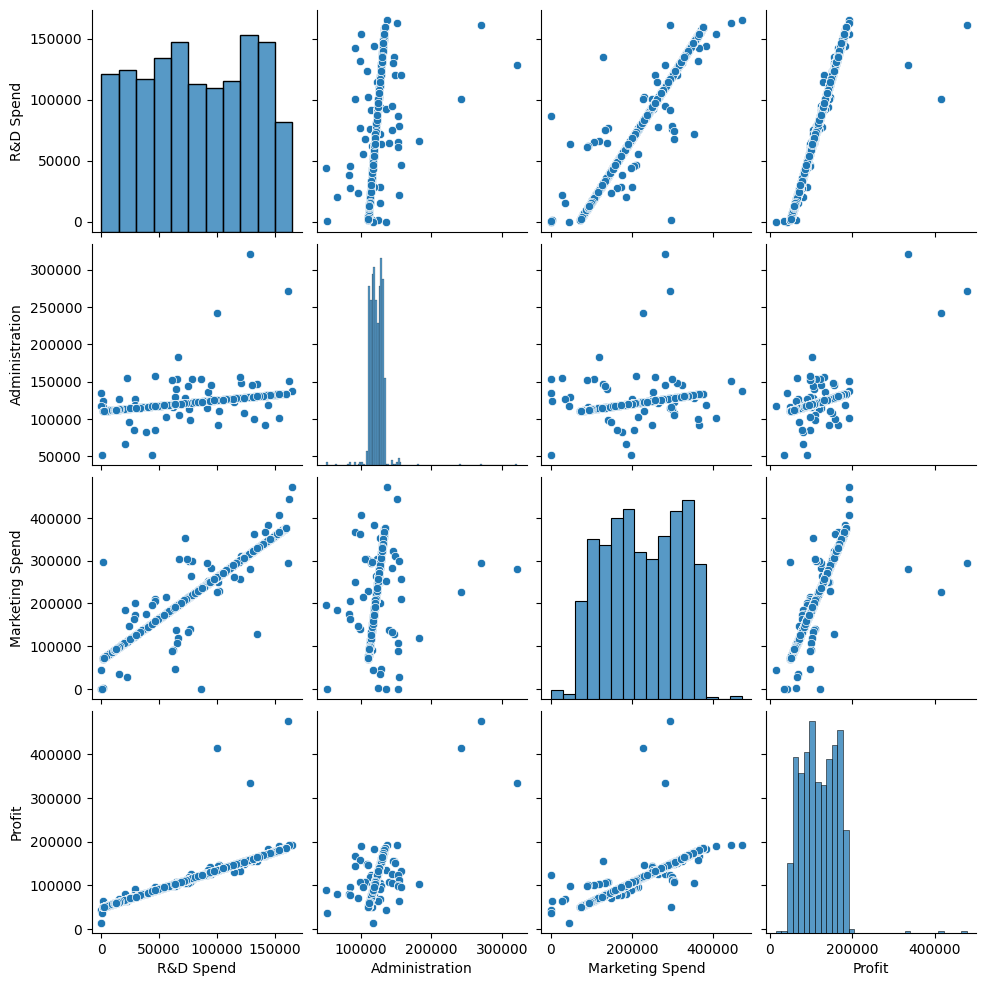

In [54]:
# Pair plot (scatter plot matrix)
sns.pairplot(companies)
plt.show()

**Extracting Independent and Dependent Variables**

In [55]:
y = companies['Profit']

In [56]:
dummy=pd.get_dummies(companies.State)
print(dummy)

     California  Florida  New York
0             0        0         1
1             1        0         0
2             0        1         0
3             0        0         1
4             0        1         0
..          ...      ...       ...
995           1        0         0
996           1        0         0
997           1        0         0
998           1        0         0
999           0        0         1

[1000 rows x 3 columns]


In [57]:
X=pd.concat([companies,dummy],axis=1)
X.drop(['State'],axis=1,inplace=True)
X=X.drop(["Profit"],axis=1)
X.head(5)

,R&D Spend,Administration,Marketing Spend,California,Florida,New York
0,165349.20,136897.80,471784.10,0,0,1
1,162597.70,151377.59,443898.53,1,0,0
2,153441.51,101145.55,407934.54,0,1,0
3,144372.41,118671.85,383199.62,0,0,1
4,142107.34,91391.77,366168.42,0,1,0


**Identify Missing Value from Dataset​**

In [58]:
missing_counts = companies.isna().sum()
print(missing_counts)

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64


**Splitting the Data into Train and Test Set**

In [59]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


**Fitting Multiple Linear Regression Model to Training Set**

In [60]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

**Predicting the Test set result**

In [61]:
y_pred = model.predict(X_test)

**Calculating the Coefficient and Intercept**

In [62]:
print(model.coef_)

[ 5.25845857e-01  8.44390881e-01  1.07574255e-01  5.26235224e+02
 -3.54301375e+02 -1.71933849e+02]


In [63]:
print(model.intercept_)

-51561.464947771135


**Perform Multiple Linear Regression Model​**

In [64]:
from sklearn.metrics import mean_squared_error, r2_score
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(r2)
print(mse)

0.9112695892268795
192148061.81508115
